In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

## ensemble 150 and 200 are the same for R0= 2.5

In [2]:
R0 = 2.5
rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])
export_dir = '../../../../../../Volumes/My Passport/branching/R025/'
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results_R025/'
for r_idx in range(9):
    r = rs[r_idx]
    print(r)
    En_NewInf = np.zeros((200,3142,60))

    for enidx in range(2,17):
        
        file_name1 = save_dir + "NewInf_R0-{}_r-{}_{}.npy.gz" .format(np.round(R0,2),np.round(r,2),enidx)
        f1 = gzip.GzipFile(file_name1, "r")
        NewInf =  np.load(f1)
        En_NewInf[10*(enidx-2):10*(enidx-1)] = NewInf
    
    enidx = 1
    file_name1 = save_dir + "NewInf_R0-{}_r-{}_{}.npy.gz" .format(np.round(R0,2),np.round(r,2),enidx)
    f1 = gzip.GzipFile(file_name1, "r")
    NewInf =  np.load(f1)
    En_NewInf[150:] = NewInf
    export_names = export_dir+'NewInf_R0-{}_r-{}'.format(np.round(R0,2),np.round(r,2))
    np.save(export_names,En_NewInf)    

20.0
10.0
2.0
1.0
0.5
0.2
0.1
0.05
0.025


In [22]:
file_name1 = save_dir + "NewInf_R0-{}_r-{}_{}.npy.gz" .format(np.round(R0,2),np.round(r,2),1)
f1 = gzip.GzipFile(file_name1, "r")
array1 =  np.load(f1)

In [23]:
combined_array = np.concatenate((array1, En_NewInf), axis=0)

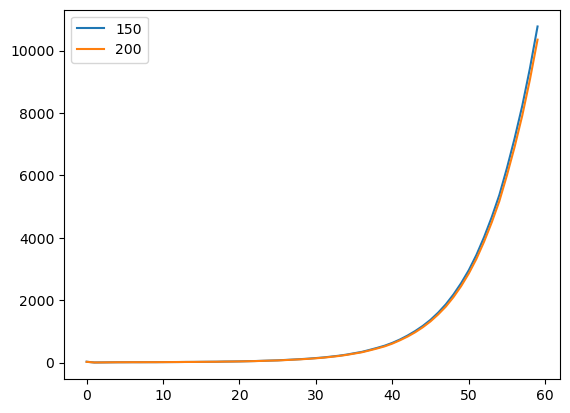

In [24]:
plt.plot(np.std(En_NewInf,axis=0)[1859-1],label='150')
plt.plot(np.std(combined_array,axis=0)[1859-1],label='200')
plt.legend()

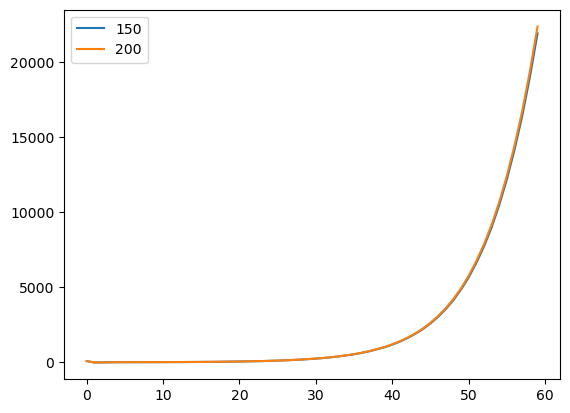

In [25]:
plt.plot(np.mean(En_NewInf,axis=0)[1859-1],label='150')
plt.plot(np.mean(combined_array,axis=0)[1859-1],label='200')
plt.legend()